# 토픽분석
    description 토큰 추출
    명사토큰 추출 okt.nouns()

In [1]:
url = "./코로나 뉴스.csv"
import pandas as pd
import numpy as np

In [11]:
data_df = pd.read_csv(url)
data_df.dropna(inplace=True)

In [12]:
description = data_df['description']

In [4]:
from konlpy.tag import Okt

In [13]:
okt = Okt()
description_noun_tk = []
for d in description:
    description_noun_tk.append(okt.nouns(d)) 

In [5]:
data_df.dropna(inplace=True)

In [14]:
#  토큰의 길이가 1보다 큰 것만 추출
description_noun_tk2 = []
for d in description_noun_tk:
     description_noun_tk2.append([i for i in d if len(i) > 1])

In [15]:
len(description_noun_tk2)

1091

# 토픽분석을 위한 LDA 모델 구축

In [8]:
!pip install gensim

     --------------------------------------- 24.0/24.0 MB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 3.1 MB/s eta 0:00:00
     ------------------------------------- 986.3/986.3 kB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 67.1/67.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=b25df66243218462290f99c9bfb7f42f1ee8dc0c2476f5d083d50cd70bdafb3d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\01\02\ee\df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3514 sha256=5f3160a2078d5596933f7f00a6f5df97a945d6b54abc54c28188849e5e3cf211
  Stored in directory: c:\users\user\appdata\

In [9]:
import gensim
import gensim.corpora as corpora

In [16]:
dictionary=corpora.Dictionary(description_noun_tk2)

In [17]:
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]

In [27]:
# 토픽의 개수를 설정 - 하이퍼 파라미터
k = 2
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations=12, num_topics=k, id2word=dictionary)

In [28]:
# 토픽분석 결과 출력
print(lda_model.print_topics(num_topics=k, num_words=15))

[(0, '0.082*"코로나" + 0.020*"진자" + 0.013*"중국" + 0.011*"신규" + 0.009*"발생" + 0.009*"방역" + 0.009*"검사" + 0.007*"대책" + 0.007*"본부" + 0.007*"기준" + 0.006*"중앙" + 0.006*"접종" + 0.006*"지난" + 0.005*"바이러스" + 0.005*"입국"'), (1, '0.086*"코로나" + 0.021*"진자" + 0.013*"접종" + 0.012*"신규" + 0.011*"방역" + 0.010*"백신" + 0.008*"발생" + 0.007*"이후" + 0.007*"기준" + 0.007*"중국" + 0.007*"대책" + 0.007*"중앙" + 0.006*"검사" + 0.006*"본부" + 0.006*"유아"')]


In [29]:
lda_topics = lda_model.print_topics(num_topics=k, num_words=15)

In [30]:
len(lda_topics), len(lda_topics[0][1].split('+'))

(2, 15)

In [31]:
dic1 = {}
dic1['토픽번호'] = [i[0] for i in lda_topics]
dic1['주요단어(15)'] = [i[1] for i in lda_topics]

In [32]:
pd.DataFrame(dic1)

,토픽번호,주요단어(15)
0,0,"0.082*""코로나"" + 0.020*""진자"" + 0.013*""중국"" + 0.011*..."
1,1,"0.086*""코로나"" + 0.021*""진자"" + 0.013*""접종"" + 0.012*..."


In [33]:
dic1['토픽레이블'] = ['확진자 신규 접종 대책','확진자 중국 방역 대책']

In [36]:
pd.DataFrame(dic1)

,토픽번호,주요단어(15),토픽레이블
0,0,"0.082*""코로나"" + 0.020*""진자"" + 0.013*""중국"" + 0.011*...",확진자 신규 접종 대책
1,1,"0.086*""코로나"" + 0.021*""진자"" + 0.013*""접종"" + 0.012*...",확진자 중국 방역 대책


# 분석결과 시각화

In [37]:
!pip install pyLDAvis

     ---------------------------------------- 1.7/1.7 MB 11.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------- 840.9/840.9 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 92.7/92.7 kB ? eta 0:00:00
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136904 sha256=1a0191a570d928e22b6a2f4a90ee4f038096ddda65d0b454c20b63cf9bc3d03a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f0\

In [38]:
import os
os.environ['PYTHONIOENCODING'] = "utf-8"

In [39]:
import pyLDAvis.gensim_models

In [40]:
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

C:\Users\user\miniconda3\envs\py\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [41]:
pyLDAvis.display(lda_vis)

In [42]:
pyLDAvis.save_html(lda_vis, '코로나 토픽분석.html')

# 머신러닝 물고기 크기 분류

In [2]:
import pandas as pd
import numpy as np
import random as rd

In [5]:
rd.random()*16+25
rd.random()*710+240
bream_length, bream_weight = [], []
for i in range(40):
    bream_length.append(round(rd.random()*16+25, 1))
    bream_weight.append(round(rd.random()*710+240, 1))

In [6]:
bream_length = sorted(bream_length)
bream_weight = sorted(bream_weight)

In [7]:
bream_length[:5], bream_weight[:5]

([25.3, 25.4, 25.6, 26.0, 26.6], [240.2, 247.8, 249.3, 274.7, 275.3])

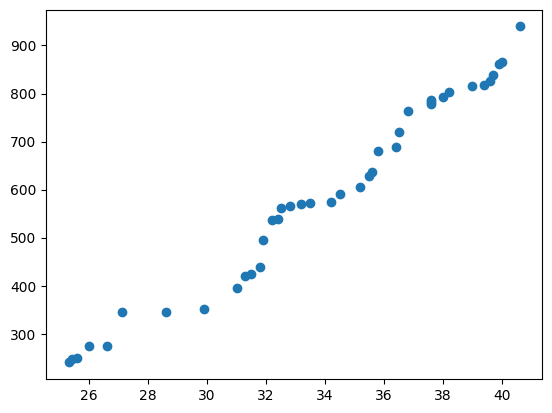

In [8]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)

In [9]:
smelt_length, smelt_weight = [], []
for i in range(40):
    smelt_length.append(round(rd.random()*6+9, 1))
    smelt_weight.append(round(rd.random()*14+6, 1))

In [10]:
smelt_length = sorted(smelt_length)
smelt_weight = sorted(smelt_weight)

In [11]:
smelt_length[:5], smelt_weight[:5]

([9.1, 9.2, 9.4, 9.5, 9.7], [6.1, 6.3, 6.3, 6.3, 6.5])

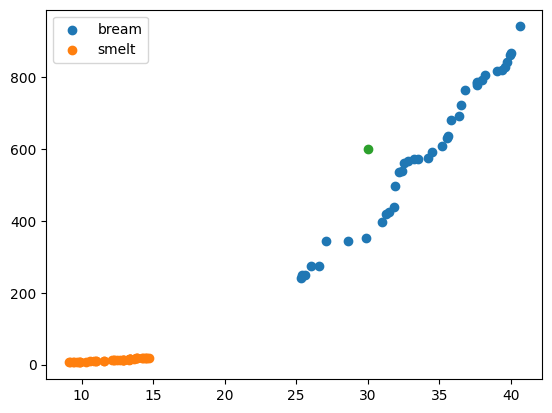

In [23]:
plt.scatter(bream_length, bream_weight, label="bream")
plt.scatter(smelt_length, smelt_weight, label="smelt")
plt.scatter(30, 600)
plt.legend()

In [16]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
target = [1]*len(bream_length) + [0]*len(smelt_length)

In [18]:
fish_df = pd.DataFrame({'length':length, 'weight':weight, 'target':target})

In [21]:
fish_data = fish_df.drop(columns=['target'])
fish_target = fish_df.drop(columns=['length', 'weight'])
fish_target.shape, fish_data.shape

((80, 1), (80, 2))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [24]:
if kn.predict([[30, 600]])[0] == 1:
    print('bream')
else:
    print('smelt')

bream


C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9125

### k 최근접 이웃알고리즘 - 거리기반의 분류 모델
### n_neighbors의 개수는 판단하려는 데이터에서 가장 가까운 이웃들의 수
### score: 정확도